In [1]:
import pandas as pd
from tqdm import tqdm
from top2vec import Top2Vec
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from pathlib import Path
import yaml 
import os

from helpers.linkage import *
from helpers import dataloader
from helpers.afa import adaptive_filter
from helpers.visuals import add_cabinet_periods
from helpers import style as style
from bs4 import BeautifulSoup as bs

# Set Plot Style
style.load_style()

# Load Config
cf = yaml.safe_load(Path('config.yml').read_text())

/home/rb/.virtualenvs/phd_venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
model_ks = list(range(50,401,25))

In [6]:
r = []
for k in model_ks:
    fn = '/home/rb/Documents/Data/case-studies/linkage/lda/diag-speech-bound-'+str(k)
    with open(fn,'r') as f:
        s = bs(f.read())

    diag = {k:float(v) for k,v in s.find('topic').attrs.items() if k != 'id'}
    diag.update({"k":k})
    r.append(diag)

In [7]:
r = pd.DataFrame(r).set_index('k')

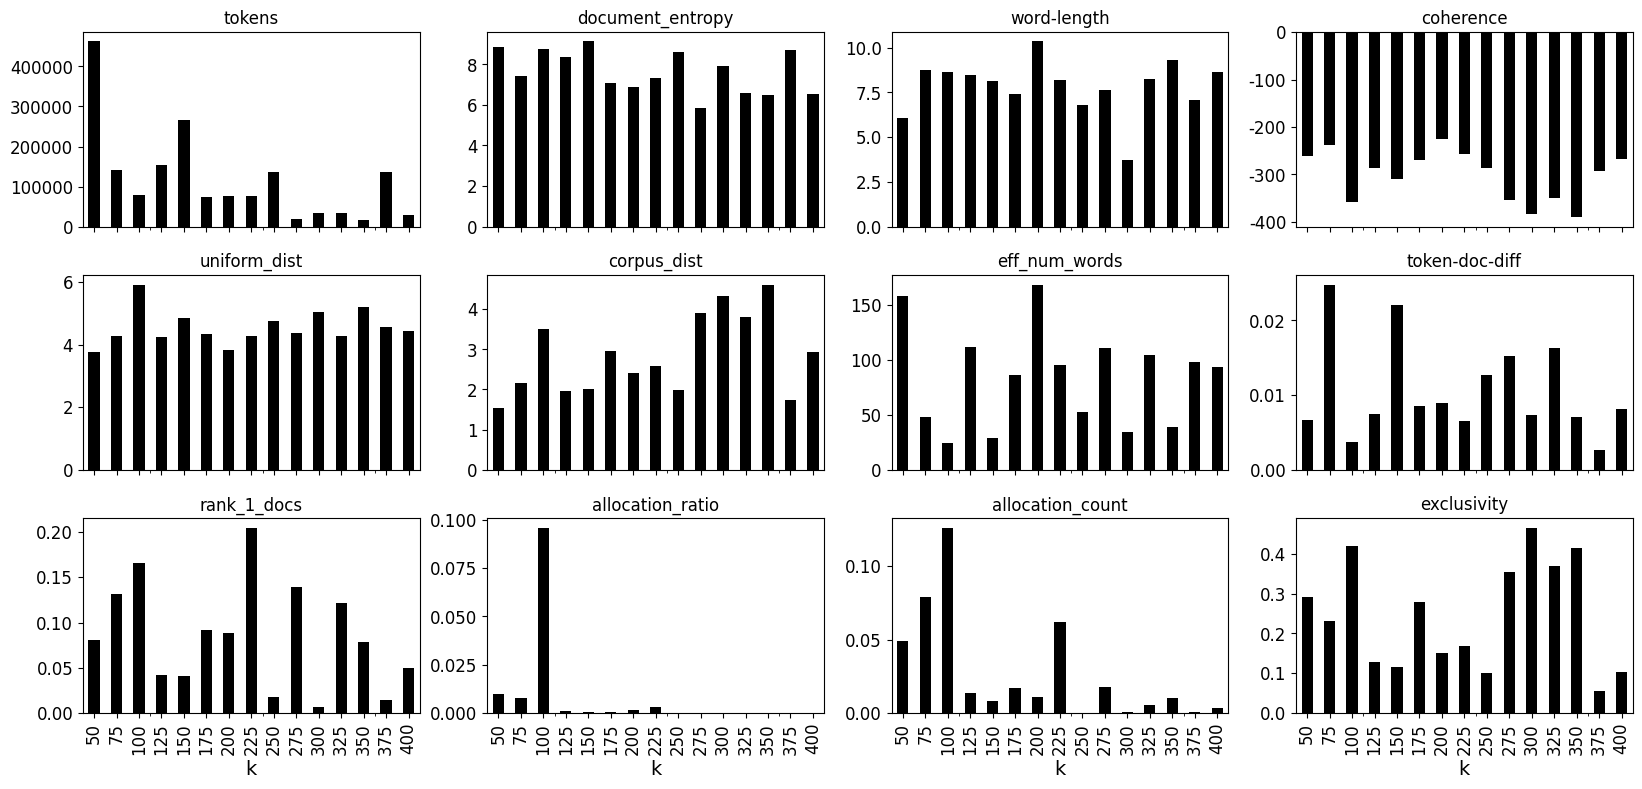

In [10]:
r.plot.bar(subplots=True,sharex=True, sharey=False, legend=False,layout=(4,4),figsize=(20,12),color='black')
plt.subplots_adjust(hspace=.25)

In [2]:
data = pd.read_csv(cf['data_path_speech'],sep='\t',usecols=['date','speech_id','role','member-ref','lemm_cleaned'])
data['date'] = pd.to_datetime(data.date,infer_datetime_format=True)

In [4]:
data['sp_l'] = data.lemm_cleaned.str.split(' ').str.len()
data['date_q'] = data.date.dt.to_period('Q').dt.to_timestamp()

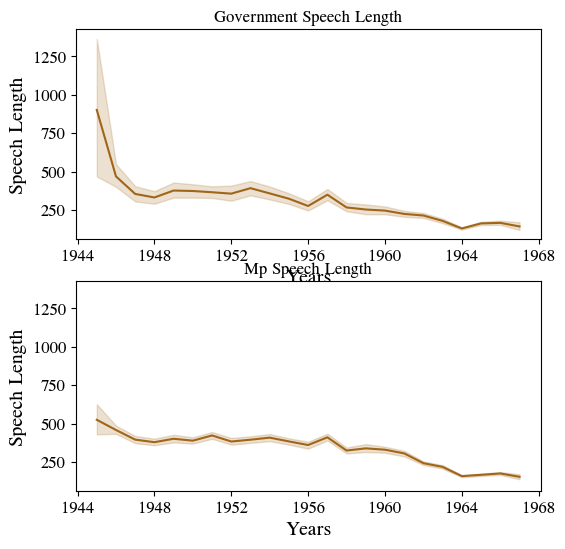

In [21]:
fig,ax = plt.subplots(2,1,figsize=(6,6),sharey=True)

for c, (g,d) in enumerate(data.groupby('role')):
    sns.lineplot(data=d,ax=ax[c],x='date_q',y='sp_l')
    ax[c].set_title(g.capitalize() + ' Speech Length')
    ax[c].set_ylabel('Speech Length')
    ax[c].set_xlabel('Years')

In [37]:
data2 = data[['date','sp_l']].groupby('date').sum().reset_index()
data2['date_q'] = data2.date.dt.to_period('Y').dt.to_timestamp()

In [16]:
data = pd.read_csv('/home/rb/Documents/Data/models/lda/full-postwar/data-speech-level-full.tsv',sep='\t',parse_dates=['date'])   

In [18]:
data['tl'] = data.lemm_cleaned.str.split(' ').str.len()
data['year'] = data.date.dt.year

In [24]:
d = data[['date','tl']].groupby('date').sum().reset_index()
d['year'] = d.date.dt.year

In [43]:
d = data[['date','tl']]
d['date'] = d.date.dt.to_period('Q')
d = d.groupby('date').mean()

/tmp/ipykernel_565/2120676658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['date'] = d.date.dt.to_period('Q')


<AxesSubplot: xlabel='date'>

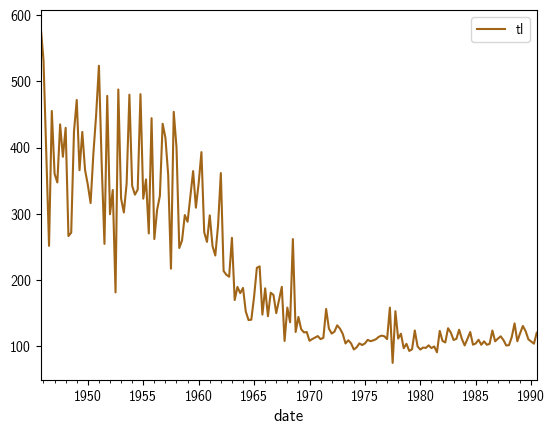

In [45]:
d.plot(y='tl')